In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')




%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vadim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
df = pd.read_csv("AI_Human.csv")
df = df.sample(frac=0.025, random_state=42)
df.reset_index(drop=True, inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       12181 non-null  object 
 1   generated  12181 non-null  float64
dtypes: float64(1), object(1)
memory usage: 190.5+ KB


In [33]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
text,object,0.000000,100,,,No issue
generated,float64,0.000000,0,0.000000,1.000000,No issue


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
text,object,0.0,100,,,No issue
generated,float64,0.0,0,0.0,1.0,No issue


In [34]:
df['generated'] = df['generated'].astype(int)
df.rename({ "text": "content"}, axis=1, inplace=True)
df.head(n=10)

,content,generated
0,"Real or Fake Feelings\n\n""Imagine being able to detect exactly hoe other people are feeling, even then they are trying to hide their emotions"" (D'Alto). The article by Nick D'Alto,\n\n""Making Mona Lisa Smile"" is about a née software, the Facial Action Coding System which can recognize emotions based on muscle movements. Some people think this technology can be useful for many industries, however it can have negative effects on some. The use of this technology to read the emotional expressions of students in a classroom is not valuable.\n\nStudents may have personal issues, and it is not necessary for classroom's to know the emotions an individual is going through. As the article explains hoe muscle movements connect at hoe someone feels, it states, ""Beckman has classified six basic emotions happiness, surprise, anger, disgust, fear, and sadness..."" ’D'Alto). This demonstrates that the technology can only detect a fee emotion. The technology may get confused, and it could determine ...",0
1,"Seeking multiple opinions can help you make better choices. If you do not get information from multiple people you may not get good choices. Talking to more than one person can give you way more information than if you were to not talk to someone at all. Some peoples' advice is better than other peoples advice, so asking multiple people is always the best thing to do. Seeking multiple opinions can help you make better choices because you are getting advice from multiple people who have already made that choice, you may get more choices, which can lead you to better choices, and you can get more information from people who have already made the choice.\n\nVetting advice from someone else is always a great thing to do. Asking for advice from another person can lead you to get more knowledge on the choice you want to make. The person you may be asking may have already made the choice and can tell you why you should or should not make that choice. Asking another person may give you a r...",0
2,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACHER_NAME,\n\nI think that kids should do community service because they can interact with more people, help the community and feel good afterwards. Community service is not wasting your time when you could be home playing Video games. It's a time when u give up your time to help someone or something in need. I feel that community service would improve some kids self-confidence. When most people do it they were forced by the school or they were with their friends, and they didn't want to be left out. Well that's not how that should be we should take the responsibility to get up and do it. When I do service I think of everyone I'He helped and lies I'He saved, Must by picking up some garbage or re-building a house that was devastate by a hurricane.\n\nCommunity service sounds like a punishment but it's not it's a reward. You receive an amazing feeling when you have helped someone. It's not Must doing something in your spare time, its giving...",0
3,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe that cell phones need to stay at home because in order for students to get a good education they need not to be distracted by devices such as a cell phone, That is why i think Policy 2 is the best one .\n\nStudents in this school should have they're phones left at home because on a test day a student forgot to study him/her texts a friend who already had that class ask him/her for the answers, and that right there is cheating. In order for students to get a good education they need to be well aware of the material in each class study for exams, test etc. and so further more if the students are distracted by they're phones the Teacher who is Teaching that class shall take up the students phone and keep it for five days with a policy of five days at the end of five days they must pay fifteen dollars to get it back. Another reason would be if students are not educated enough and they fail the TAKS 

In [35]:
df['content'] = df['content'].str.lower()
df.drop_duplicates(inplace=True)

In [36]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)
df['tokenized_content'] = df['content'].apply(tokenize_text)
df

,content,generated,tokenized_content
0,"real or fake feelings\n\n""imagine being able to detect exactly hoe other people are feeling, even then they are trying to hide their emotions"" (d'alto). the article by nick d'alto,\n\n""making mona lisa smile"" is about a née software, the facial action coding system which can recognize emotions based on muscle movements. some people think this technology can be useful for many industries, however it can have negative effects on some. the use of this technology to read the emotional expressions of students in a classroom is not valuable.\n\nstudents may have personal issues, and it is not necessary for classroom's to know the emotions an individual is going through. as the article explains hoe muscle movements connect at hoe someone feels, it states, ""beckman has classified six basic emotions happiness, surprise, anger, disgust, fear, and sadness..."" ’d'alto). this demonstrates that the technology can only detect a fee emotion. the technology may get confused, and it could determine ...",0,"[real, or, fake, feelings, '', imagine, being, able, to, detect, exactly, hoe, other, people, are, feeling, ,, even, then, they, are, trying, to, hide, their, emotions, '', (, d'alto, ), ., the, article, by, nick, d'alto, ,, '', making, mona, lisa, smile, '', is, about, a, née, software, ,, the, facial, action, coding, system, which, can, recognize, emotions, based, on, muscle, movements, ., some, people, think, this, technology, can, be, useful, for, many, industries, ,, however, it, can, have, negative, effects, on, some, ., the, use, of, this, technology, to, read, the, emotional, expressions, of, students, in, a, classroom, is, ...]"
1,"seeking multiple opinions can help you make better choices. if you do not get information from multiple people you may not get good choices. talking to more than one person can give you way more information than if you were to not talk to someone at all. some peoples' advice is better than other peoples advice, so asking multiple people is always the best thing to do. seeking multiple opinions can help you make better choices because you are getting advice from multiple people who have already made that choice, you may get more choices, which can lead you to better choices, and you can get more information from people who have already made the choice.\n\nvetting advice from someone else is always a great thing to do. asking for advice from another person can lead you to get more knowledge on the choice you want to make. the person you may be asking may have already made the choice and can tell you why you should or should not make that choice. asking another person may give you a r...",0,"[seeking, multiple, opinions, can, help, you, make, better, choices, ., if, you, do, not, get, information, from, multiple, people, you, may, not, get, good, choices, ., talking, to, more, than, one, person, can, give, you, way, more, information, than, if, you, were, to, not, talk, to, someone, at, all, ., some, peoples, ', advice, is, better, than, other, peoples, advice, ,, so, asking, multiple, people, is, always, the, best, thing, to, do, ., seeking, multiple, opinions, can, help, you, make, better, choices, because, you, are, getting, advice, from, multiple, people, who, have, already, made, that, choice, ,, you, may, get, ...]"
2,"address_name\n\nfebruary 9, 2011\n\ndear teacher_name,\n\ni think that kids should do community service because they can interact with more people, help the community and feel good afterwards. community service is not wasting your time when you could be home playing video games. it's a time when u give up your time to help someone or something in need. i feel that community service would improve some kids self-confidence. when most people do it they were forced by the school or they were with their friends, and they didn't want to be left out. well that's not how that should be we should take the responsibility to get up and do it. when i do s

In [37]:
counts = df['generated'].value_counts()
print(counts)


generated
0    7570
1    4611
Name: count, dtype: int64


In [38]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
all_tokens = [token for sublist in df['tokenized_content'] for token in sublist]

fdist = FreqDist(all_tokens)

df_top_words = pd.DataFrame(fdist.most_common(150), columns=['word', 'frequency'])

df_top_words

,word,frequency
0,.,229808
1,the,219410
2,",",215342
3,to,164565
4,and,126375
5,a,113611
6,of,99795
7,in,83083
8,that,75954
9,is,68529


In [39]:
replacement_dict = {
    "u": "you",
    "r": "are",
    "'s": "is",
    "'m": "am",
    "n't": "not",
    "ur": "your",
    "txt": "text",
    "msg": "message",
    "'re": "are",
    "'ve": "have",
    "'ll": "will",
    "&" : "and"
}

df['tokenized_content'] = df['tokenized_content'].apply(lambda tokens: 
                                                        [replacement_dict.get(token, token) for token in tokens])


In [40]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):

    tokens_without_stopwords = [token for token in tokens if token not in stop_words]

    tokens_without_punctuation = [token for token in tokens_without_stopwords if token not in string.punctuation]
    custom_punctuation = ['..', '...']
    tokens_without_custom_punctuation = [token for token in tokens_without_punctuation if token not in custom_punctuation]
    
    return tokens_without_custom_punctuation

df['tokenized_content_without_stopwords'] = df['tokenized_content'].apply(remove_stopwords)

df.head(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vadim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,generated,tokenized_content,tokenized_content_without_stopwords
0,"real or fake feelings\n\n""imagine being able to detect exactly hoe other people are feeling, even then they are trying to hide their emotions"" (d'alto). the article by nick d'alto,\n\n""making mona lisa smile"" is about a née software, the facial action coding system which can recognize emotions based on muscle movements. some people think this technology can be useful for many industries, however it can have negative effects on some. the use of this technology to read the emotional expressions of students in a classroom is not valuable.\n\nstudents may have personal issues, and it is not necessary for classroom's to know the emotions an individual is going through. as the article explains hoe muscle movements connect at hoe someone feels, it states, ""beckman has classified six basic emotions happiness, surprise, anger, disgust, fear, and sadness..."" ’d'alto). this demonstrates that the technology can only detect a fee emotion. the technology may get confused, and it could determine ...",0,"[real, or, fake, feelings, '', imagine, being, able, to, detect, exactly, hoe, other, people, are, feeling, ,, even, then, they, are, trying, to, hide, their, emotions, '', (, d'alto, ), ., the, article, by, nick, d'alto, ,, '', making, mona, lisa, smile, '', is, about, a, née, software, ,, the, facial, action, coding, system, which, can, recognize, emotions, based, on, muscle, movements, ., some, people, think, this, technology, can, be, useful, for, many, industries, ,, however, it, can, have, negative, effects, on, some, ., the, use, of, this, technology, to, read, the, emotional, expressions, of, students, in, a, classroom, is, ...]","[real, fake, feelings, '', imagine, able, detect, exactly, hoe, people, feeling, even, trying, hide, emotions, '', d'alto, article, nick, d'alto, '', making, mona, lisa, smile, '', née, software, facial, action, coding, system, recognize, emotions, based, muscle, movements, people, think, technology, useful, many, industries, however, negative, effects, use, technology, read, emotional, expressions, students, classroom, valuable, students, may, personal, issues, necessary, classroom, know, emotions, individual, going, article, explains, hoe, muscle, movements, connect, hoe, someone, feels, states, ``, beckman, classified, six, basic, emotions, happiness, surprise, anger, disgust, fear, sadness, '', ’, d'alto, demonstrates, technology, detect, fee, emotion, technology, may, get, confused, could, determine, ...]"
1,"seeking multiple opinions can help you make better choices. if you do not get information from multiple people you may not get good choices. talking to more than one person can give you way more information than if you were to not talk to someone at all. some peoples' advice is better than other peoples advice, so asking multiple people is always the best thing to do. seeking multiple opinions can help you make better choices because you are getting advice from multiple people who have already made that choice, you may get more choices, which can lead you to better choices, and you can get more information from people who have already made the choice.\n\nvetting advice from someone else is always a great thing to do. asking for advice from another person can lead you to get more knowledge on the choice you want to make. the person you may be asking may have already made the choice and can tell you why you should or should not make that choice. asking another person may give you a r...",0,"[seeking, multiple, opinions, can, help, you, make, better, choices, ., if, you, do, not, get, information, from, multiple, people, you, may, not, get, good, choices, ., talking, to, more, than, one, person, can, give, you, way, more, information, than, if, you, were, to, not, talk, to, someone, at, all, ., some, peoples, ', advice, is, better, than, other, peoples, advice, ,, so, asking, multiple, people, is, always, the, best, thin

In [41]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_content'] = df['tokenized_content_without_stopwords'].apply(lemmatize_text)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vadim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,generated,tokenized_content,tokenized_content_without_stopwords,lemmatized_content
0,"real or fake feelings\n\n""imagine being able to detect exactly hoe other people are feeling, even then they are trying to hide their emotions"" (d'alto). the article by nick d'alto,\n\n""making mona lisa smile"" is about a née software, the facial action coding system which can recognize emotions based on muscle movements. some people think this technology can be useful for many industries, however it can have negative effects on some. the use of this technology to read the emotional expressions of students in a classroom is not valuable.\n\nstudents may have personal issues, and it is not necessary for classroom's to know the emotions an individual is going through. as the article explains hoe muscle movements connect at hoe someone feels, it states, ""beckman has classified six basic emotions happiness, surprise, anger, disgust, fear, and sadness..."" ’d'alto). this demonstrates that the technology can only detect a fee emotion. the technology may get confused, and it could determine ...",0,"[real, or, fake, feelings, '', imagine, being, able, to, detect, exactly, hoe, other, people, are, feeling, ,, even, then, they, are, trying, to, hide, their, emotions, '', (, d'alto, ), ., the, article, by, nick, d'alto, ,, '', making, mona, lisa, smile, '', is, about, a, née, software, ,, the, facial, action, coding, system, which, can, recognize, emotions, based, on, muscle, movements, ., some, people, think, this, technology, can, be, useful, for, many, industries, ,, however, it, can, have, negative, effects, on, some, ., the, use, of, this, technology, to, read, the, emotional, expressions, of, students, in, a, classroom, is, ...]","[real, fake, feelings, '', imagine, able, detect, exactly, hoe, people, feeling, even, trying, hide, emotions, '', d'alto, article, nick, d'alto, '', making, mona, lisa, smile, '', née, software, facial, action, coding, system, recognize, emotions, based, muscle, movements, people, think, technology, useful, many, industries, however, negative, effects, use, technology, read, emotional, expressions, students, classroom, valuable, students, may, personal, issues, necessary, classroom, know, emotions, individual, going, article, explains, hoe, muscle, movements, connect, hoe, someone, feels, states, ``, beckman, classified, six, basic, emotions, happiness, surprise, anger, disgust, fear, sadness, '', ’, d'alto, demonstrates, technology, detect, fee, emotion, technology, may, get, confused, could, determine, ...]","[real, fake, feeling, '', imagine, able, detect, exactly, hoe, people, feeling, even, trying, hide, emotion, '', d'alto, article, nick, d'alto, '', making, mona, lisa, smile, '', née, software, facial, action, coding, system, recognize, emotion, based, muscle, movement, people, think, technology, useful, many, industry, however, negative, effect, use, technology, read, emotional, expression, student, classroom, valuable, student, may, personal, issue, necessary, classroom, know, emotion, individual, going, article, explains, hoe, muscle, movement, connect, hoe, someone, feel, state, ``, beckman, classified, six, basic, emotion, happiness, surprise, anger, disgust, fear, sadness, '', ’, d'alto, demonstrates, technology, detect, fee, emotion, technology, may, get, confused, could, determine, ...]"
1,"seeking multiple opinions can help you make better choices. if you do not get information from multiple people you may not get good choices. talking to more than one person can give you way more information than if you were to not talk to someone at all. some peoples' advice is better than other peoples advice, so asking multiple people is always the best thing to do. seeking multiple opinions can help you make better choices because you are getting advice from multiple people who have already made that choice, you may get more choices, which can lead you to better choices, and you can get more information 

In [42]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Join the tokens in 'lemmatized_content' column into a single string
# df['joined_tokens'] = df['lemmatized_content'].apply(lambda tokens: ' '.join(tokens))

# # Initialize the TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the data using the TF-IDF vectorizer
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['joined_tokens'])

# # Convert the TF-IDF matrix to a DataFrame
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Перед объединением сбросим индекс в df
# df.reset_index(drop=True, inplace=True)

# # Объединяем DataFrame'ы
# df_tfidf = pd.concat([df, tfidf_df], axis=1)


# # Drop unnecessary columns
# columns_to_drop = ['content', 'tokenized_content', 'tokenized_content_without_stopwords', 'lemmatized_content']
# df_tfidf.drop(columns=columns_to_drop, inplace=True)
# df_tfidf


In [43]:
# print(df_tfidf.isnull().sum())


In [44]:
# all_tokens = [token for sublist in df['lemmatized_content'] for token in sublist]

# fdist = FreqDist(all_tokens)

# df_top_words = pd.DataFrame(fdist.most_common(100), columns=['word', 'frequency'])

# df_top_words

In [45]:
# def check_words(text):
#     words_to_check = ['win', 'claim', 'free', 'prize']
#     for word in words_to_check:
#         if word in text:
#             return 1
#     return 0


# df['contains_specific_words'] = df['lemmatized_content'].apply(check_words)
# df

In [46]:
# df_tfidf.info()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd




vectorizer = CountVectorizer()


X = vectorizer.fit_transform(df['lemmatized_content'].apply(' '.join))
y = df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

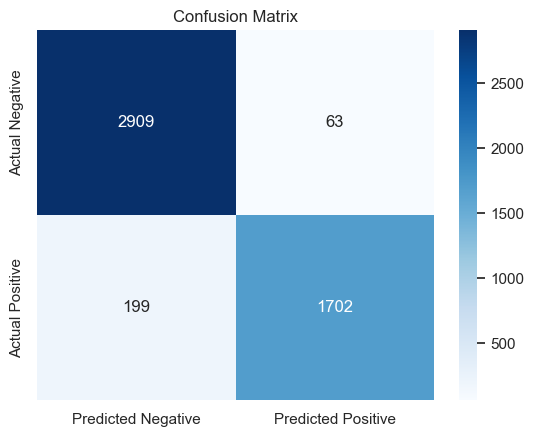

In [58]:

y_pred = (y_pred > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, index = ['Actual Negative', 'Actual Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('--------------------------')
print("Confusion Matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("[[{}  {}]".format(tn, fp))
print(" [{}  {}]]".format(fn, tp))

# Вывод отчета о классификации
print('--------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9462343525548943
--------------------------
Confusion Matrix:
[[2909  63]
 [199  1702]]
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2972
           1       0.96      0.90      0.93      1901

    accuracy                           0.95      4873
   macro avg       0.95      0.94      0.94      4873
weighted avg       0.95      0.95      0.95      4873



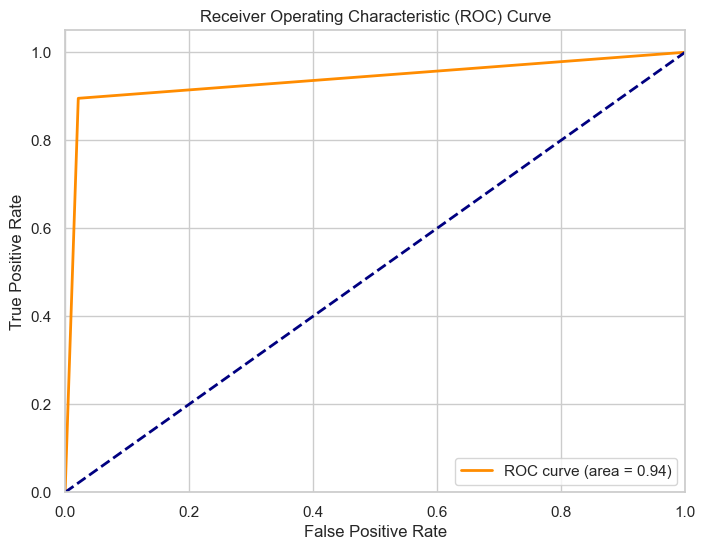

In [50]:
from sklearn.metrics import roc_curve, auc

# Получение вероятностей принадлежности к положительному классу (спаму)
y_pred_probs = model.predict(X_test)

# Вычисление кривой ROC и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Построение кривой ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/2
229/229 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.8881 - loss: 0.2514 - val_accuracy: 0.9803 - val_loss: 0.0637
Epoch 2/2
229/229 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step - accuracy: 0.9934 - loss: 0.0277 - val_accuracy: 0.9799 - val_loss: 0.0575


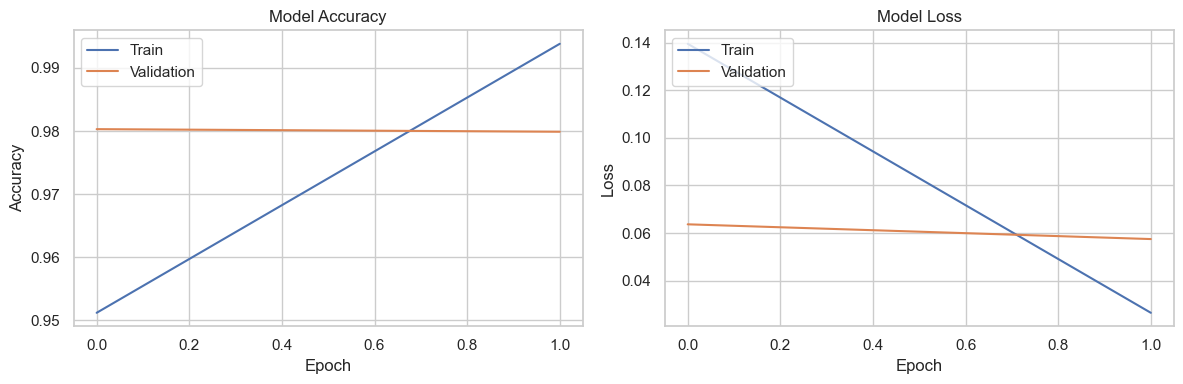

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import LSTM


vectorizer = CountVectorizer()


X = vectorizer.fit_transform(df['lemmatized_content'].apply(' '.join))
y = df['generated']

# Разделение данных на обучающий, валидационный и тестовый наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Преобразование данных для LSTM
X_train = X_train.toarray().reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.toarray().reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.toarray().reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(96, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_val, y_val))

# Отображение графика точности обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Отображение графика потерь обучения
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


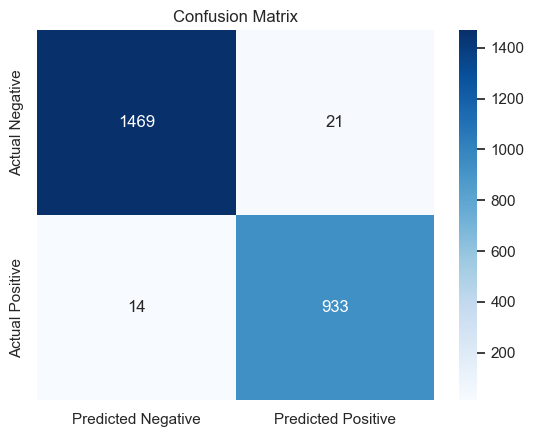

In [52]:
=
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, index = ['Actual Negative', 'Actual Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])


sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [53]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9815 - loss: 0.0716
Test Accuracy: 0.9856380820274353
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
--------------------------
Confusion Matrix:
[[1469  21]
 [14  933]]
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1490
           1       0.98      0.99      0.98       947

    accuracy                           0.99      2437
   macro avg       0.98      0.99      0.98      2437
weighted avg       0.99      0.99      0.99      2437



77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


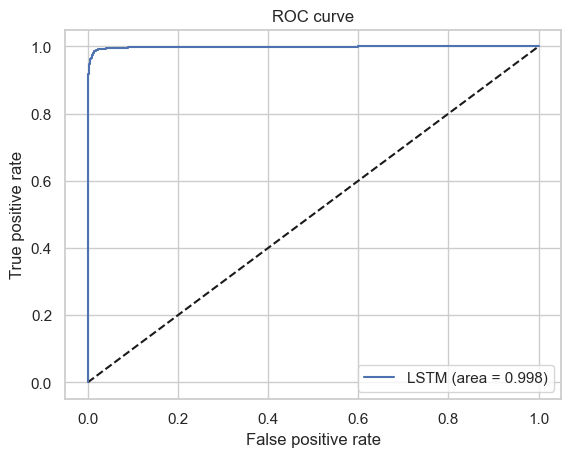

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LSTM (area = {:.3f})'.format(auc_value))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
